In [3]:
#Objective: The classification goal is to predict the likelihood of a liability customer buying personal loans
# Step 1: Read the column description and ensure you understand each attribute well 

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

In [5]:
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.columns = ["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
#Below 5 variables can have values in binary - True/False.
#Personal Loan : Did this customer accept the personal loan offered in the last campaign? This is our target variable.
#Securities Account - Does the customer have a securities account with the bank?
#CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
#Online - Does the customer use internet banking facilities?
#Credit Card - Does the customer use a credit card issued by UniversalBank?

#Interval variables are as below:
#Age - Customer's age in completed years
#Experience - #years of professional experience
#CCAvg - Avg. spending on credit cards per month ($000)
#Mortage - Value of house mortgage if any. ($000)

#Ordinal Variables are:
#Family - Family size of the customer
#Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

#Below two are nominal variables, which does not add any value as they will not help in predicting the 
#likelihood of a liability of customer buying personal loans :

#ID - Customer ID
#Zip Code - Home Address ZIP code


In [14]:
data.shape

(5000, 14)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                   5000 non-null int64
Age                  5000 non-null int64
Experience           5000 non-null int64
Income               5000 non-null int64
ZIPCode              5000 non-null int64
Family               5000 non-null int64
CCAvg                5000 non-null float64
Education            5000 non-null int64
Mortgage             5000 non-null int64
PersonalLoan         5000 non-null int64
SecuritiesAccount    5000 non-null int64
CDAccount            5000 non-null int64
Online               5000 non-null int64
CreditCard           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [16]:
# No columns have null data in the file
data.apply(lambda x : sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [17]:
# Eye balling the data
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [18]:
#finding unique data
data.apply(lambda x: len(x.unique()))

ID                   5000
Age                    45
Experience             47
Income                162
ZIPCode               467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
PersonalLoan            2
SecuritiesAccount       2
CDAccount               2
Online                  2
CreditCard              2
dtype: int64

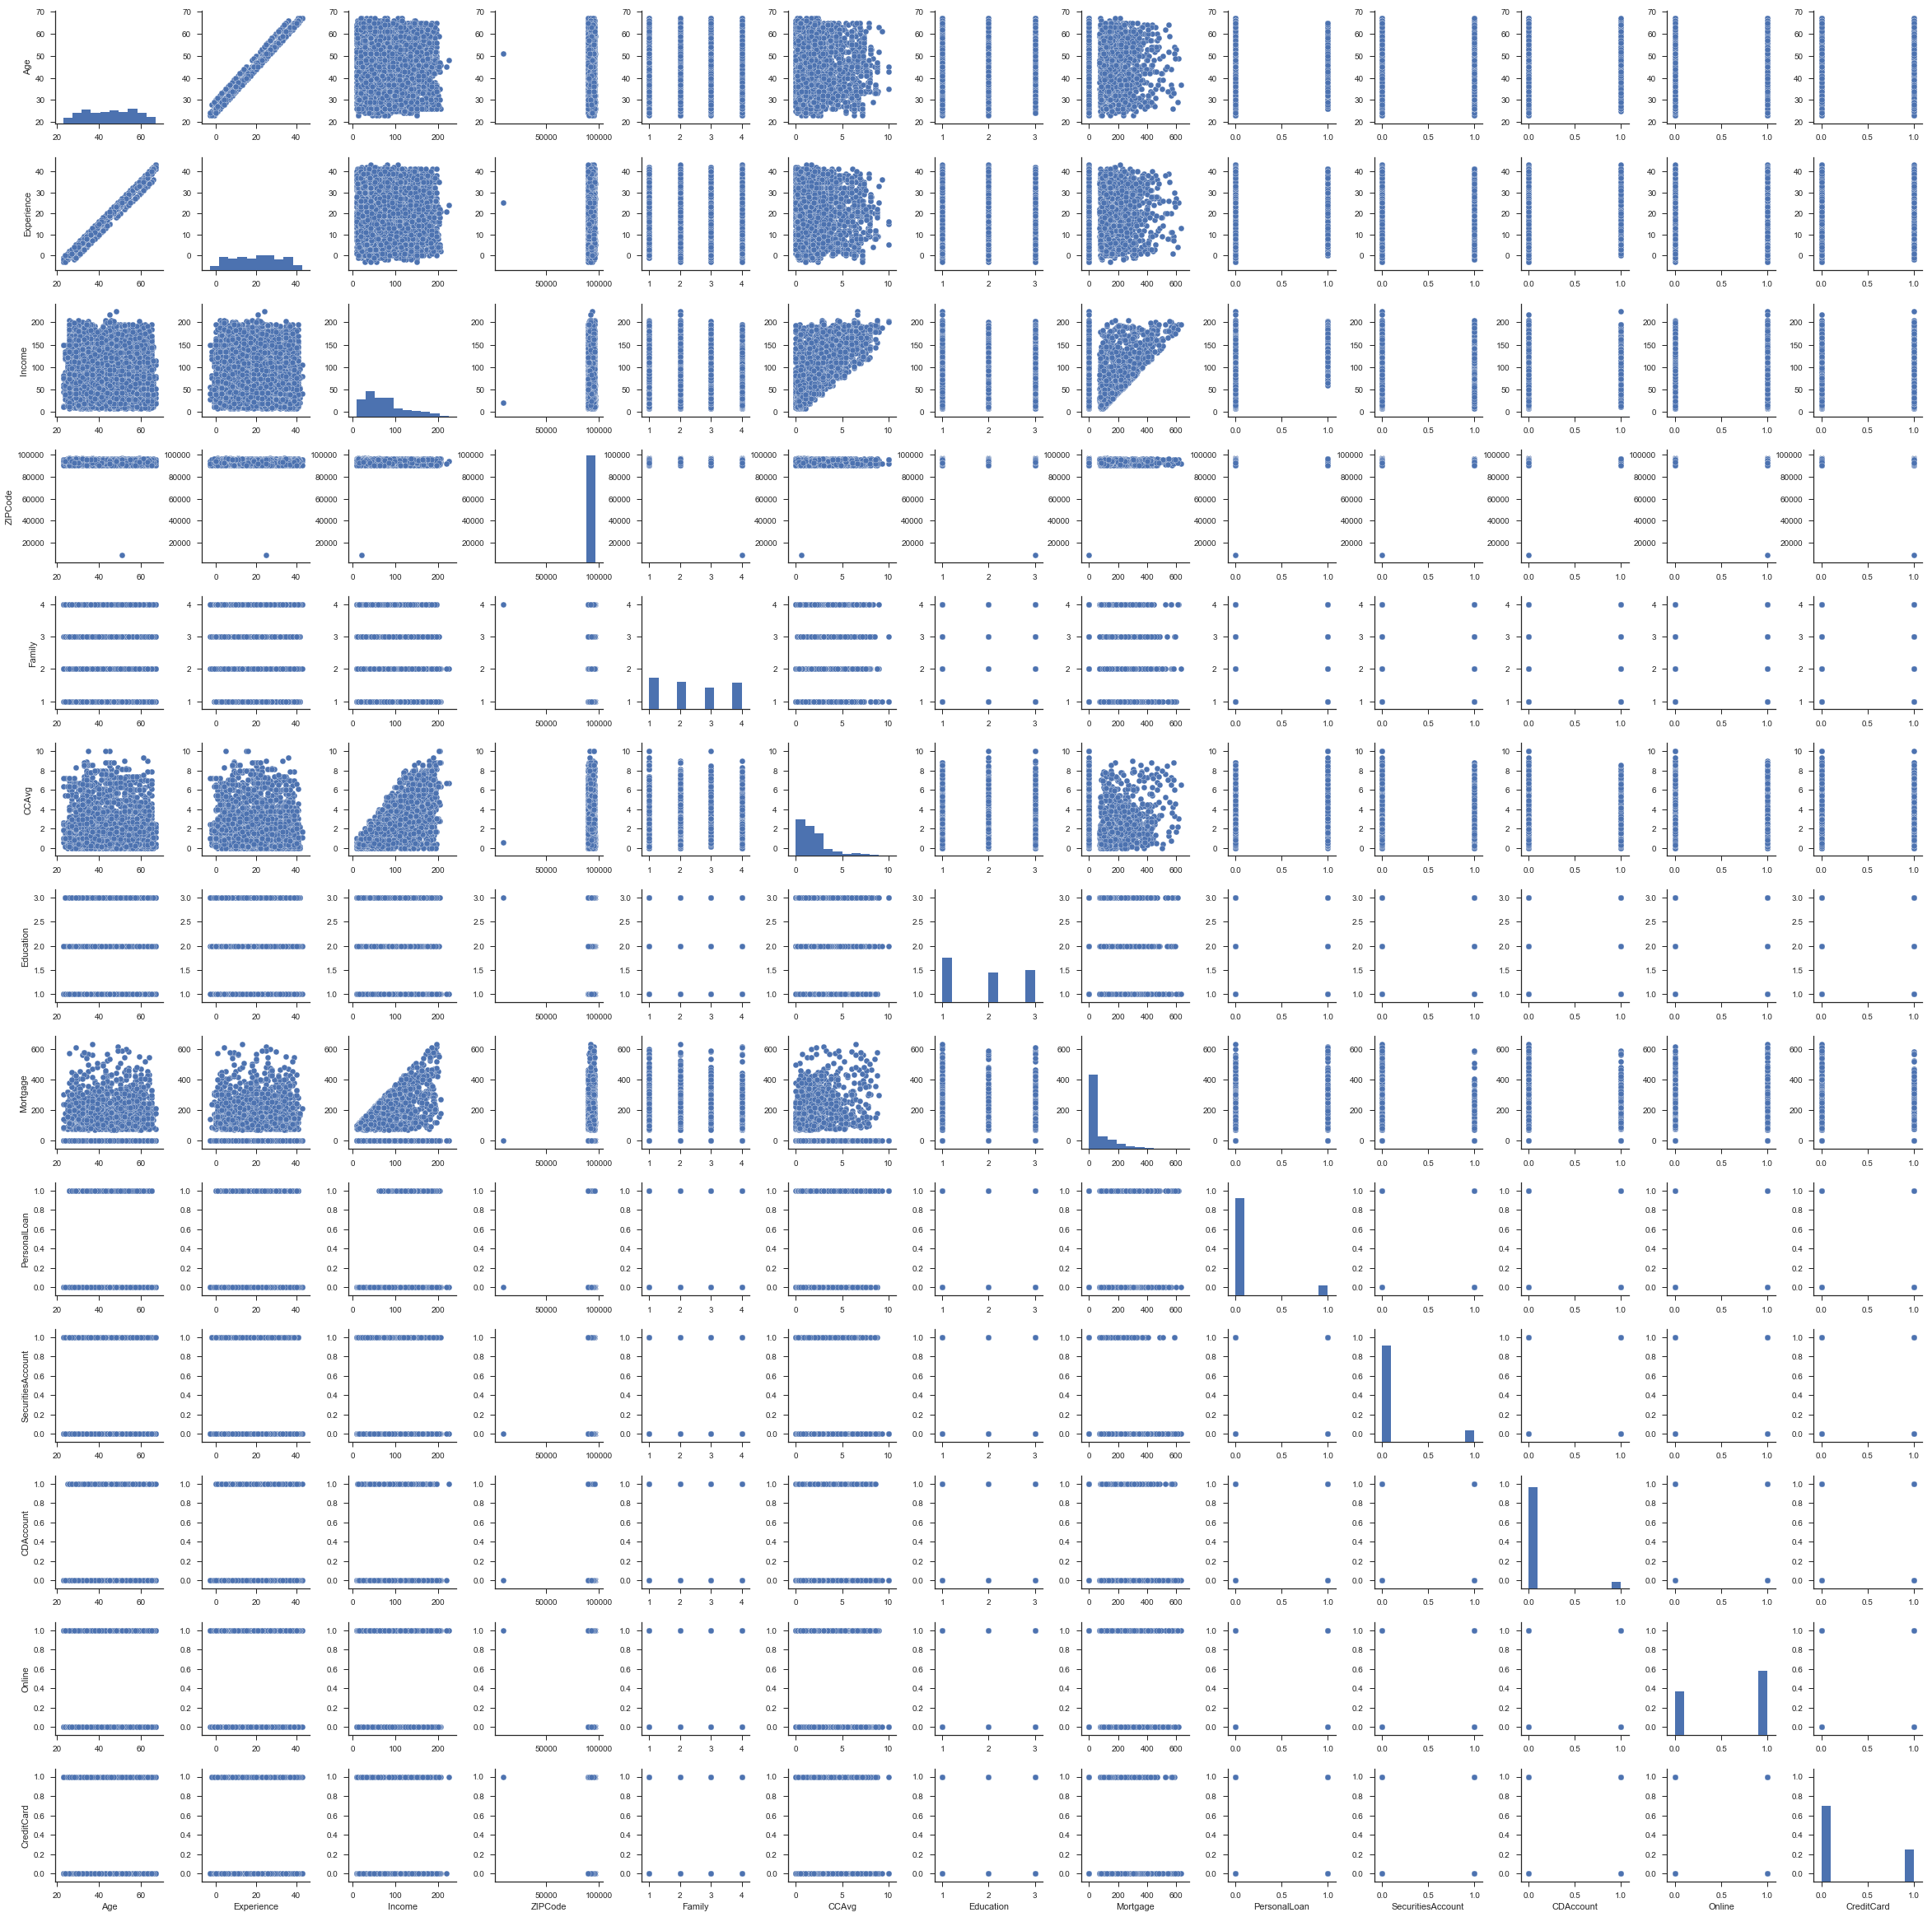

In [21]:
sns.pairplot(data.iloc[:,1:])

In [22]:
#Age feature is normally distributed with majority of customers falling between 30 years and 60 years of age. 
#We can confirm this by looking at the describe statement above, which shows mean is almost equal to median

#Experience is normally distributed with more customer having experience starting from 8 years. 
#Here the mean is equal to median. There are negative values in the Experience. 
#This could be a data input error, which can be deleted.

#Income is positively skewed. Majority of the customers have income between 45K and 55K. 
#We can confirm as the mean is greater than the median

#CCAvg is also a positively skewed variable and average spending is between 0K to 10K and majority spends less than 2.5K

#Mortgage:  70% of the individuals have a mortgage of less than 40K. However the max value is 635K

#The variables family and education are ordinal variables. The distribution of families is evenly distributed

In [23]:
# there are 52 records with negative experience. Before proceeding any further we need to clean the same
data[data['Experience'] < 0]['Experience'].count()

52

In [24]:
dfExp = data.loc[data['Experience'] >0]
negExp = data.Experience < 0
column_name = 'Experience'
mylist = data.loc[negExp]['ID'].tolist()

In [25]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [26]:
for id in mylist:
    age = data.loc[np.where(data['ID']==id)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExp[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [27]:
# checking if there are records with negative experience
data[data['Experience'] < 0]['Experience'].count()

0

In [28]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


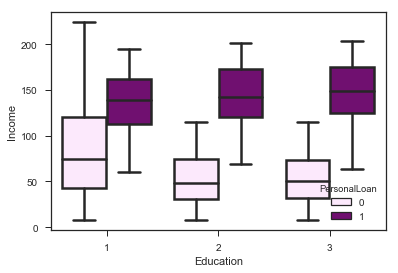

In [58]:
#Influence of income and education on personal loan
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data, color = 'purple')

In [31]:
#It seems the customers whose education level is 1 is having more income. 
#However customers who has taken the personal loan have the same income levels

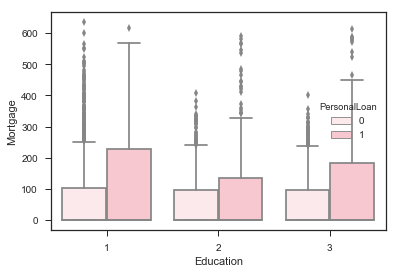

In [33]:
sns.boxplot(x="Education", y='Mortgage', hue="PersonalLoan", data=data, color='pink')

In [34]:
#From the above chart we can infer that customer who do not have personal loan 
#and customer who has personal loan have high mortgage

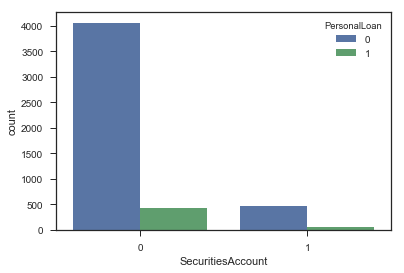

In [36]:
sns.countplot(x="SecuritiesAccount", data=data,hue="PersonalLoan")
#From the below chart, we can infer that majority of customers who does not have loan have securities account

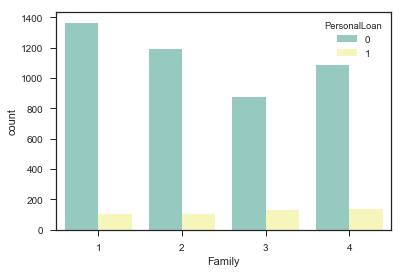

In [59]:
sns.countplot(x='Family',data=data,hue='PersonalLoan',palette='Set3')
#From the below chart, it seems families with size of 3 are more likely to take loan. 
#However this might not be a good association as it does not look significant.

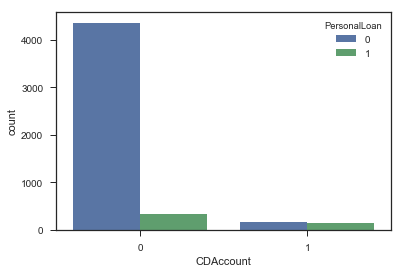

In [41]:
sns.countplot(x='CDAccount',data=data,hue='PersonalLoan')
#Customers who does not have CD account , does not have loan as well. 
# This seems to be majority. But almost all customers who has CD account has loan as well

In [43]:
print('Credit card spending of Non-Loan customers: ',data[data.PersonalLoan == 0]['CCAvg'].median()*1000)
print('Credit card spending of Loan customers    : ', data[data.PersonalLoan == 1]['CCAvg'].median()*1000)

Credit card spending of Non-Loan customers:  1400.0
Credit card spending of Loan customers    :  3800.0


In [44]:
#Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. 
#Lower credit card spending with a median of 1400 dollars is less likely to take a loan. 
#This could be useful information.

Text(0,0.5,'Age')

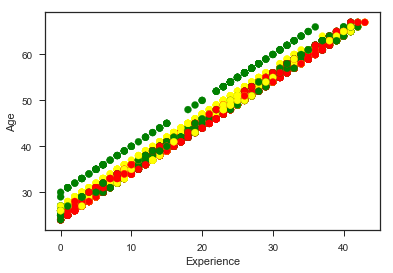

In [49]:
fig, ax = plot.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(data['Experience'],data['Age'],c=data['Education'].apply(lambda x:colors[x]))
plot.xlabel('Experience')
plot.ylabel('Age')
#Below chart shows that experience and age have a positive correlation.
#colors show the education level.

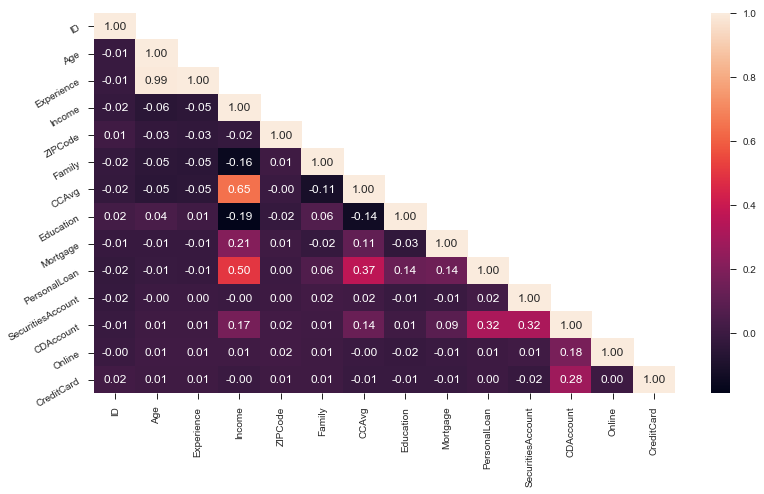

In [50]:
# Correlation with heat map
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [51]:
#Income and CCAvg is moderately correlated.
#Age and Experience is highly correlated

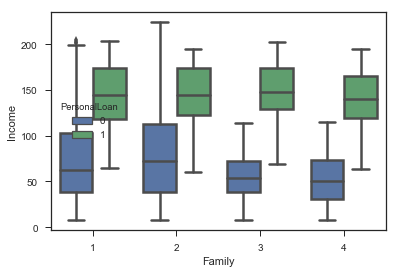

In [52]:
sns.boxplot(x=data.Family,y=data.Income,hue=data.PersonalLoan)
# Looking at the below plot, families with income less than 100K are less likely to take loan,than families with 
# high income

Applying Models:
Splitting data into train and test

In [53]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)
train_labels = train_set.pop('PersonalLoan')
test_labels = test_set.pop('PersonalLoan')

Naive Bayes

In [86]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)


0.88666666666666671

KNN K Nearest Neighbor

In [80]:
train_set_indep = data.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "PersonalLoan" , axis = 1)
train_set_dep = data["PersonalLoan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)
knn_cm = metrics.confusion_matrix(Y_Test, predicted)
print(knn_cm)

0.910607071381
[0 0 0 ..., 0 0 0]
[[1359   14]
 [ 120    6]]


Logistic Regression

In [66]:
logmodel = LogisticRegression()
logmodel.fit(X_Train,Y_Train)
predictions = logmodel.predict(X_Test)
print(classification_report(Y_Test,predictions))

             precision    recall  f1-score   support

          0       0.93      0.97      0.95      1373
          1       0.42      0.26      0.32       126

avg / total       0.89      0.91      0.90      1499



In [74]:
logisticregression_cm = metrics.confusion_matrix(Y_Test, predictions)
print(logisticregression_cm)
score = logmodel.score(X_Test, Y_Test)
print(score)

[[1328   45]
 [  93   33]]
0.907938625751


KNN: 0.898600 (0.008902)
NB: 0.885600 (0.010385)
LR: 0.908200 (0.007871)


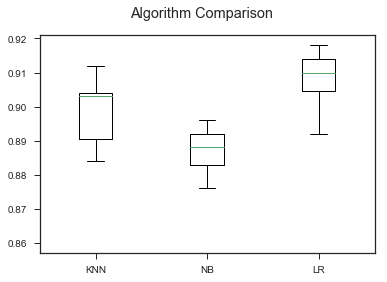

In [78]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('LR', LogisticRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=12345)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

We have used the data and applied 3 models: Naive Bayes, KNN and Logistic Regression Classifiers. Based on the above model comparison, we can use Logistic Regression.